In [1]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos con la ruta correcta
train = pd.read_csv('C:/Users/DOLEUSER/Desktop/Cursos UNAV/1-Python/Obesity/Obesity/notebooks/3-Models/train.csv')
test = pd.read_csv('C:/Users/DOLEUSER/Desktop/Cursos UNAV/1-Python/Obesity/Obesity/notebooks/3-Models/test.csv')

In [3]:
# Definir características y objetivo
target = 'nobeyesdad'
features = train.columns.drop(target)

# Dividir datos en características y objetivo
X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [4]:
# Inicializar y entrenar el modelo CatBoost
model = CatBoostClassifier(iterations=100, learning_rate=0.1, random_seed=1)
model.fit(X_train, y_train)

0:	learn: 1.7194342	total: 171ms	remaining: 17s
1:	learn: 1.5509601	total: 186ms	remaining: 9.13s
2:	learn: 1.4174428	total: 198ms	remaining: 6.4s
3:	learn: 1.3077695	total: 209ms	remaining: 5.01s
4:	learn: 1.2063469	total: 221ms	remaining: 4.19s
5:	learn: 1.1252906	total: 234ms	remaining: 3.67s
6:	learn: 1.0606131	total: 248ms	remaining: 3.3s
7:	learn: 1.0009092	total: 259ms	remaining: 2.98s
8:	learn: 0.9564201	total: 271ms	remaining: 2.74s
9:	learn: 0.9004943	total: 283ms	remaining: 2.54s
10:	learn: 0.8624257	total: 294ms	remaining: 2.38s
11:	learn: 0.8206881	total: 308ms	remaining: 2.26s
12:	learn: 0.7813210	total: 322ms	remaining: 2.15s
13:	learn: 0.7554432	total: 337ms	remaining: 2.07s
14:	learn: 0.7175280	total: 351ms	remaining: 1.99s
15:	learn: 0.6915812	total: 368ms	remaining: 1.93s
16:	learn: 0.6697755	total: 380ms	remaining: 1.85s
17:	learn: 0.6481079	total: 393ms	remaining: 1.79s
18:	learn: 0.6254284	total: 407ms	remaining: 1.73s
19:	learn: 0.6070612	total: 422ms	remaining: 

In [5]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)

Accuracy:  0.9626168224299065
Confusion Matrix: 
 [[65  1  0  0  0  0  0]
 [ 2 54  0  0  0  4  1]
 [ 0  0 71  1  0  0  1]
 [ 0  0  0 63  0  0  0]
 [ 0  0  0  0 54  0  0]
 [ 0  2  0  0  0 49  0]
 [ 0  0  3  0  0  1 56]]
Classification Report: 
                      precision    recall  f1-score   support

Insufficient_Weight       0.97      0.98      0.98        66
      Normal_Weight       0.95      0.89      0.92        61
     Obesity_Type_I       0.96      0.97      0.97        73
    Obesity_Type_II       0.98      1.00      0.99        63
   Obesity_Type_III       1.00      1.00      1.00        54
 Overweight_Level_I       0.91      0.96      0.93        51
Overweight_Level_II       0.97      0.93      0.95        60

           accuracy                           0.96       428
          macro avg       0.96      0.96      0.96       428
       weighted avg       0.96      0.96      0.96       428



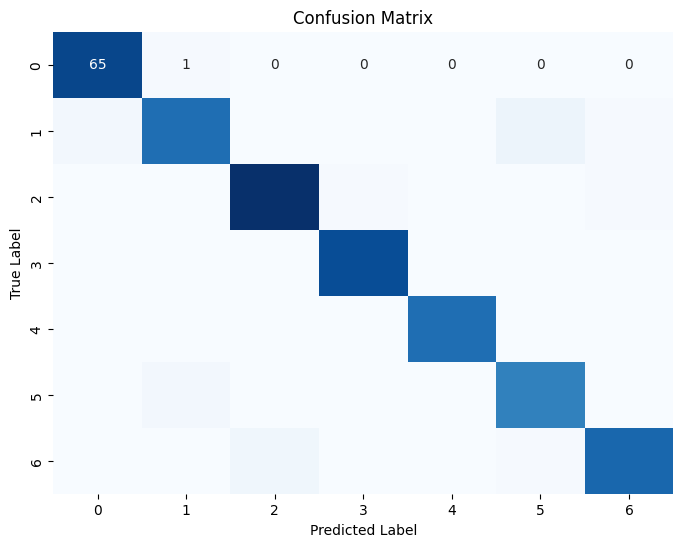

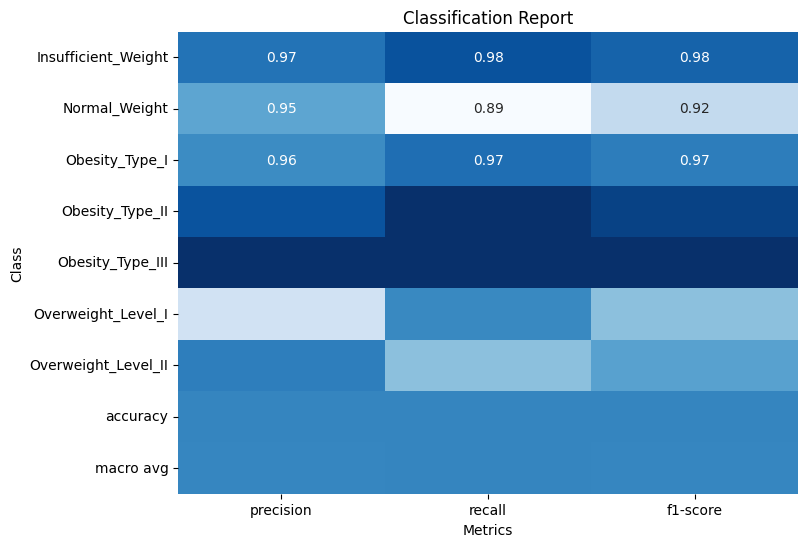

In [13]:
# Calcular y mostrar métricas de evaluación
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report_str = classification_report(y_test, predictions)

print("Accuracy: ", accuracy)
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", class_report_str)

# Procesar el informe de clasificación y construir el DataFrame
class_report_dict = classification_report(y_test, predictions, output_dict=True)
class_report_df = pd.DataFrame(class_report_dict).transpose()

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Visualización del informe de clasificación
plt.figure(figsize=(8, 6))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f", cbar=False)
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.show()


In [7]:
# Guardar el modelo si es necesario
# model.save_model('ruta_para_guardar/model.cb', format='cbm')